## Heart Attack Analysis & Perdiction & My Practice

### What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numaric Features
* Normalization
* Cat - Correlation Plot Analysis
* Outlier Detection ('1.5')
* Modelling and Tuning Machine Learnin Model

### Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

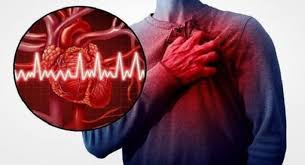

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analysis](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Normalization](#8)
1. [Boxplot Analysis](#9)
1. [Cat Plot Analysis](#10)
1. [Correlation Analysis](#11)
1. [Outlier Detection](#12)
1. [Modelling](#13)
   1. Encoding Categorical Columns

<a id=1></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# for Box-Cox Transformation
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id=2></a>
## Data Content

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

<a id=3></a>
## Read & Analysis

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id=4></a>
## Missing Value Analysis

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id=5></a>
## Unique Value Analysis

In [7]:
df['sex'].value_counts().shape[0]

2

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
for i in list(df.columns):
    print("{} -- {}".format(i,df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id=6></a>
## Categorical Feature Analysis

In [10]:
categorical_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

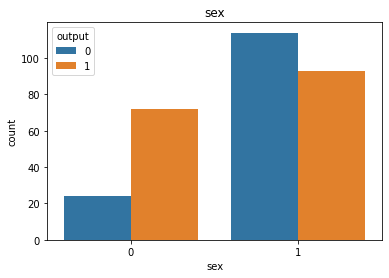

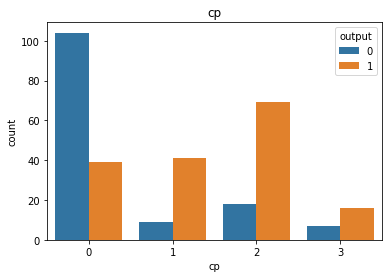

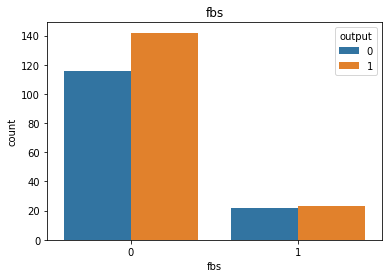

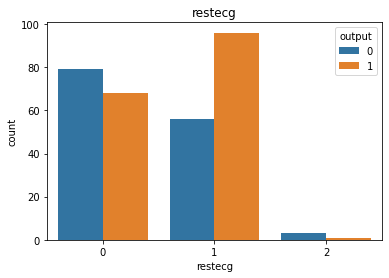

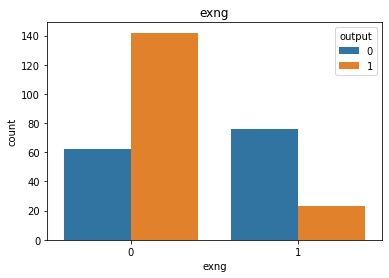

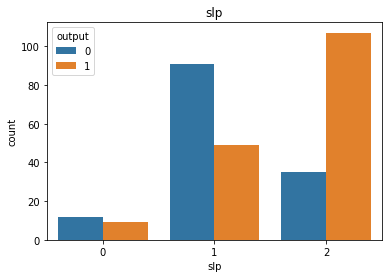

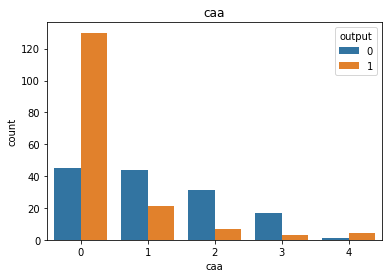

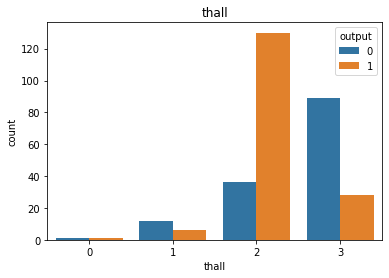

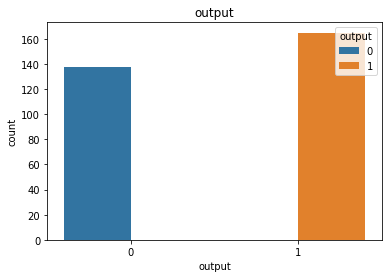

In [11]:
df_categoric= df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="output")
    plt.title(i)


<a id=7></a>
## Numeric Feature Analysis
* Bivariate data analysis whit scatter plot

In [12]:
numeric_list =["age","trtbps","chol","thalachh","oldpeak","output"]

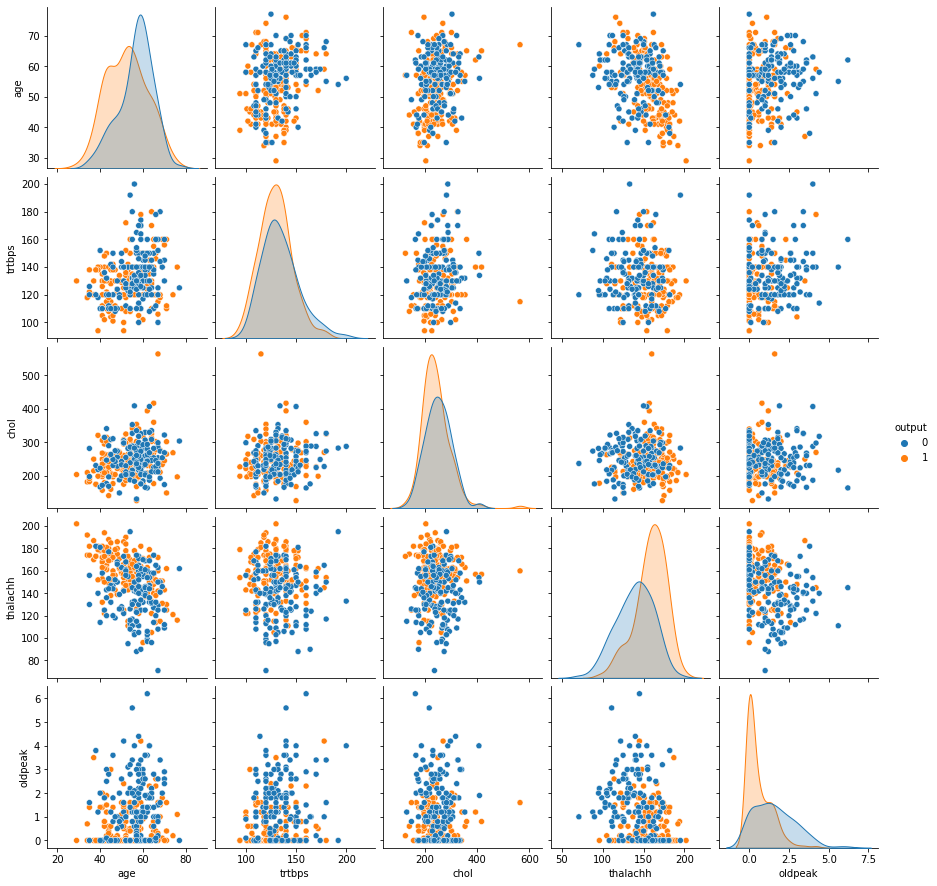

In [13]:
df_numeric= df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()


<a id=8></a>
## Normalization
* for column=chol

In [14]:
chol_array= np.array(df["chol"])
norm_array = preprocessing.normalize([chol_array])
print("{}".format(norm_array))

[[0.0531927  0.05707371 0.04657215 0.05387759 0.08081638 0.04383261
  0.06711869 0.06004155 0.04543068 0.03835354 0.05456247 0.06278108
  0.06072643 0.04817021 0.06460744 0.04999657 0.07762025 0.05159464
  0.05638883 0.05456247 0.053421   0.0531927  0.05159464 0.05547565
  0.04543068 0.06894505 0.04839851 0.0399516  0.09519895 0.04497409
  0.04520238 0.04040819 0.04999657 0.0623245  0.0486268  0.04040819
  0.06940164 0.05296441 0.06141132 0.08218615 0.07031482 0.05593224
  0.04748533 0.06026984 0.07328265 0.07419583 0.05364929 0.05867178
  0.04931169 0.053421   0.05844348 0.06894505 0.05273611 0.03218957
  0.0575303  0.04588727 0.05068146 0.05935666 0.04154966 0.06917334
  0.06049814 0.07054311 0.04246284 0.04634386 0.04817021 0.04177796
  0.05068146 0.053421   0.05022487 0.04771362 0.05890007 0.05182293
  0.04657215 0.05958496 0.0486268  0.05707371 0.05593224 0.05045316
  0.04680045 0.05479077 0.05707371 0.07031482 0.07259776 0.06803187
  0.06049814 0.1287583  0.06323767 0.04497409 0.

* example to MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled = scaler.fit_transform(df[numeric_list[:-1]])

In [17]:
print(scaled)

[[0.70833333 0.48113208 0.24429224 0.60305344 0.37096774]
 [0.16666667 0.33962264 0.28310502 0.88549618 0.56451613]
 [0.25       0.33962264 0.17808219 0.77099237 0.22580645]
 ...
 [0.8125     0.47169811 0.15296804 0.53435115 0.5483871 ]
 [0.58333333 0.33962264 0.01141553 0.33587786 0.19354839]
 [0.58333333 0.33962264 0.25114155 0.78625954 0.        ]]


In [18]:
pd.DataFrame(norm_array).describe()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000
mean,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878
25%,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878
50%,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878
75%,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878
max,0.053193,0.057074,0.046572,0.053878,0.080816,0.043833,0.067119,0.060042,0.045431,0.038354,...,0.048399,0.038582,0.042691,0.044974,0.04018,0.055019,0.06027,0.044061,0.029907,0.053878


<a id=9></a>
## Boxplot Analysis

In [19]:
df_dummy = pd.DataFrame(scaled , columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.702290,0.096774


In [20]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]],axis=1)

In [21]:
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.708333,0.481132,0.244292,0.603053,0.370968,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1


In [22]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name="features", value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.708333
1,1,age,0.166667
2,1,age,0.250000
3,1,age,0.562500
4,1,age,0.583333
5,1,age,0.583333
6,1,age,0.562500
7,1,age,0.312500
8,1,age,0.479167
9,1,age,0.583333


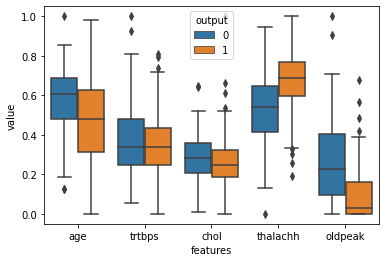

In [23]:
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

<a id=10></a>
## Cat Plot Analysis

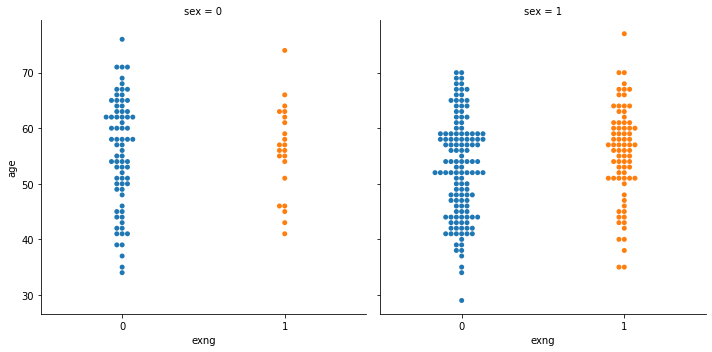

In [24]:
sns.catplot(x="exng", y="age", col="sex",kind="swarm", data=df)
plt.show()

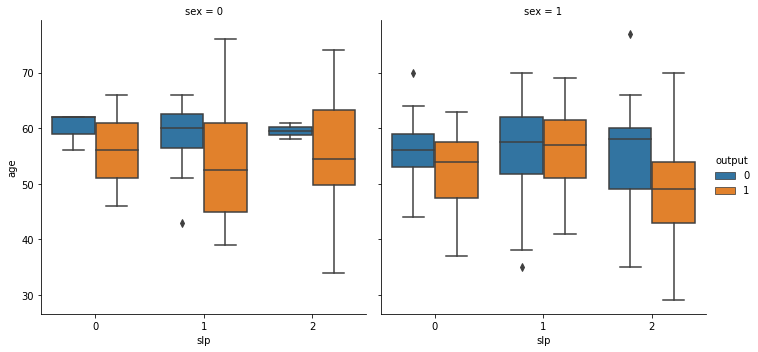

In [25]:
sns.catplot(x='slp', y = 'age', hue='output', col="sex", kind="box", data=df)
plt.show()

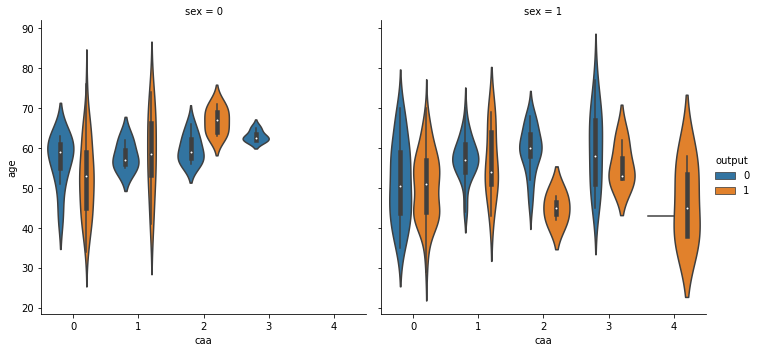

In [26]:

sns.catplot(x='caa', y = 'age', hue='output', col="sex", kind="violin", data=df)
plt.show()

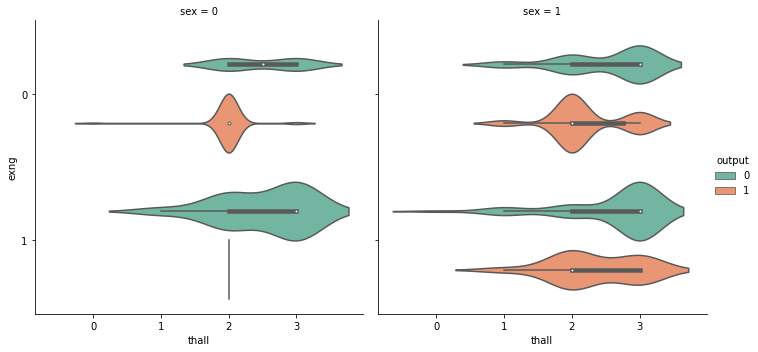

In [27]:
sns.catplot(x='thall', y = 'exng', hue='output', col="sex", kind="violin",orient="h",palette="Set2", data=df)
plt.show()

<a id=11></a>
## Correlation Analysis

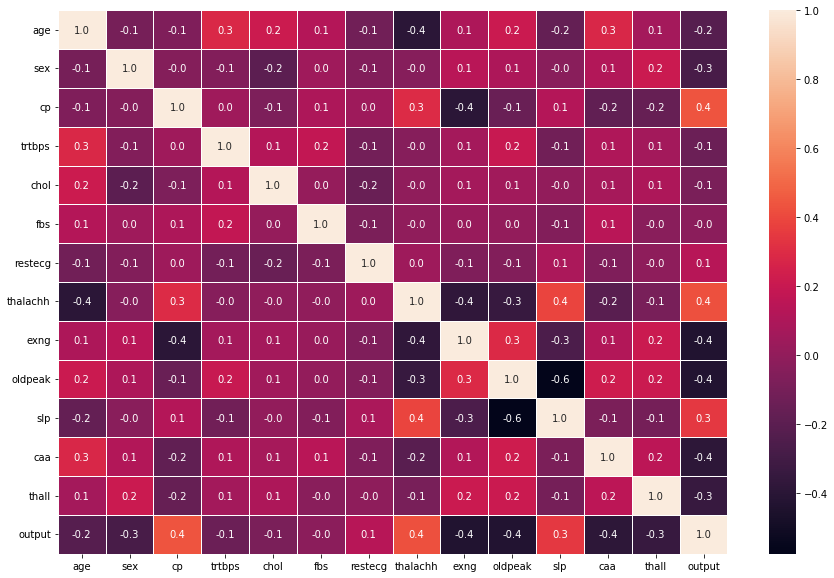

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt=".1f",linewidths=.7)
plt.show()

<a id=12></a>
## Outlier Detection
* Outlier can discrupt ML process.

In [29]:
numeric_list= ["age","trtbps","chol","thalachh","oldpeak","output"]
df_numeric= df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [30]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
#outlier detection

for i in numeric_list:
    
    #IQR
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)
    IQR =Q3 -Q1
    
    print("old shape: ", df.loc[:,i].shape)
    
    #upper bound
    upper = np.where(df.loc[:,i] >= (Q3 + 1.5*IQR))
    
    #lower bound
    lower = np.where(df.loc[:,i] <= (Q1 - 1.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace=True)
    except:
        print("KeyError: {} not found in axis".format(upper[0]))
    try:
        df.drop(lower[0], inplace=True)
    except:
        print("KeyError: {} not found in axis".format(lower[0]))

old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
old shape:  (303,)
(array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),) -- (array([], dtype=int64),)
old shape:  (290,)
(array([ 27,  84,  95, 214, 237]),) -- (array([], dtype=int64),)
old shape:  (285,)
(array([], dtype=int64),) -- (array([255]),)
old shape:  (284,)
(array([195, 210, 211, 235, 273, 276]),) -- (array([], dtype=int64),)
KeyError: [195 210 211 235 273 276] not found in axis
old shape:  (284,)
(array([], dtype=int64),) -- (array([], dtype=int64),)


<a id=13> </a>
## Modelling

In [32]:
df1= df.copy()

### Encoding Categorical Columns

In [33]:
df1=pd.get_dummies(df1, columns = categorical_list[:-1], drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [34]:
X =df1.drop(["output"],axis=1)
y= df1["output"]

In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

### Normalization
* MinMaxScaler

In [36]:
norm = MinMaxScaler()
norm

MinMaxScaler()

In [37]:
X[numeric_list[:-1]] = norm.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.708333,0.718310,0.244292,0.603053,0.370968,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0.166667,0.507042,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.250000,0.507042,0.178082,0.770992,0.225806,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.562500,0.366197,0.251142,0.816794,0.129032,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.583333,0.366197,0.520548,0.702290,0.096774,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Train/Test Split

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state= 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (198, 22)
X_test: (86, 22)
y_train: (198,)
y_test: (86,)


### Logistic Regression

In [39]:
logreg = LogisticRegression()

In [40]:
# fitting = training
logreg.fit(X_train,y_train)


LogisticRegression()

In [41]:
# calculate probabilities
y_preb_prob = logreg.predict_proba(X_test)
y_preb_prob

array([[0.01002717, 0.98997283],
       [0.50984022, 0.49015978],
       [0.06252844, 0.93747156],
       [0.16083712, 0.83916288],
       [0.13453408, 0.86546592],
       [0.04440166, 0.95559834],
       [0.44554154, 0.55445846],
       [0.07153116, 0.92846884],
       [0.42331033, 0.57668967],
       [0.78037357, 0.21962643],
       [0.79621868, 0.20378132],
       [0.9923559 , 0.0076441 ],
       [0.3604985 , 0.6395015 ],
       [0.23989862, 0.76010138],
       [0.04544288, 0.95455712],
       [0.09476934, 0.90523066],
       [0.25626638, 0.74373362],
       [0.97976047, 0.02023953],
       [0.9636327 , 0.0363673 ],
       [0.28050692, 0.71949308],
       [0.04300879, 0.95699121],
       [0.97622239, 0.02377761],
       [0.25476119, 0.74523881],
       [0.81837638, 0.18162362],
       [0.98368176, 0.01631824],
       [0.02349237, 0.97650763],
       [0.06361115, 0.93638885],
       [0.05713013, 0.94286987],
       [0.84981126, 0.15018874],
       [0.75236153, 0.24763847],
       [0.

In [42]:
y_pred = np.argmax(y_preb_prob, axis=1)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [43]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.8488372093023255


### Roc Curve

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_preb_prob[:,1])

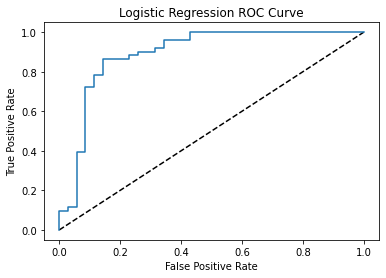

In [45]:
#plot curve
plt.plot([0,1],[0,1] ,"k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [46]:
lr= LogisticRegression()
lr

LogisticRegression()

In [47]:
penalty = ["l1","l2"]
parameters = { "penalty":penalty}

In [48]:
lr_searcher= GridSearchCV(lr, parameters)

In [49]:
lr_searcher.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [50]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [51]:
y_pred = lr_searcher.predict(X_test)

In [52]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.8488372093023255
